In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [3]:
# import ipynb.fs.full.functions as F

In [11]:
root = '/home/raul/Documents/uon_cluster/robots/push-to-see/logs/'

push_to_see_file_name = 'testing_3_obj_2021-08-30.13:07:40/test_non_agnostic_logs2021-08-30.13:07:40.txt'

casts = {'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'}

# push_to_see_file_name = '2021-08-25.16:45:59/test_non_agnostic_logs2021-08-25.16:45:59.txt'
full_exploration_file_name = 'expl_600_2021-08-31.14:11:48/test_non_agnostic_logs2021-08-31.14:11:48.txt'
highest_point_file_name = 'pseudo_3_onj_2021-08-31.23:08:20/test_non_agnostic_logs2021-08-31.23:08:20.txt'

df_push_to_see = pd.read_csv(root + push_to_see_file_name)
df_push_to_see = df_push_to_see.fillna(0)
df_push_to_see = df_push_to_see.astype(casts)

df_full_exploration = pd.read_csv(root + full_exploration_file_name)
df_full_exploration = df_full_exploration.fillna(0)
df_full_exploration = df_full_exploration.astype(casts)

df_highest_point = pd.read_csv(root + highest_point_file_name)
df_highest_point = df_highest_point.drop(['loss'], axis=1)
df_highest_point = df_highest_point.fillna(0)
df_highest_point = df_highest_point.astype(casts)

dfs = [df_push_to_see, df_full_exploration, df_highest_point]

df_push_to_see.head()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
0,0,1,1,3,2,0.000000,0.442507,0.000000,0.000000
1,1,2,1,3,2,0.007663,0.450170,0.170927,0.011441
2,2,3,1,3,2,0.046708,0.496879,0.413251,0.003524
3,3,0,1,3,3,0.323206,0.820084,10.628603,9.738446
4,4,1,2,3,2,0.000000,0.447090,0.185106,0.016133


In [12]:
df_full_exploration.head()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
0,0,1,1,3,2,0.000000,0.427261,0.000000,0.000000
1,1,2,1,3,2,0.032796,0.460057,0.319292,1.122259
2,2,3,1,3,1,-0.368884,0.091172,-13.399290,12.621904
3,3,0,1,3,3,0.676443,0.767615,45.990944,45.536304
4,4,1,2,3,1,0.000000,0.058048,0.363806,0.185313


In [13]:
df_highest_point.head()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward
0,0,1,1,3,1,0.0,0.054981,0.000000
1,1,2,1,3,1,0.0,0.054981,0.239511
2,2,3,1,3,1,0.0,0.054981,0.233714
3,3,4,1,3,1,0.0,0.054981,0.202297
4,4,5,1,3,1,0.0,0.054981,0.208459


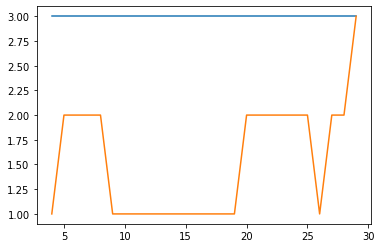

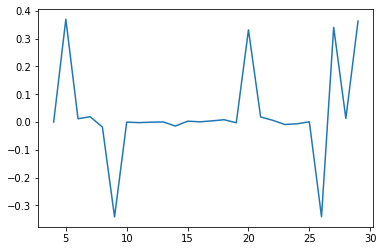

In [15]:
run_index = 1
df_index = 1

runs = pd.unique(dfs[df_index]['run'])[run_index]
df_temp = dfs[df_index]
df = dfs[df_index].loc[lambda x: x['run'] == runs]

plt.plot(df[['obj_init', 'obj_found']])
plt.show()
plt.plot(df['diff_seg_reward'])
plt.show()


In [21]:
def df_with_obj(df, n):
    return df[df['obj_init'] == n]

def is_successful(df, thr=30):
    return df.shape[0] < thr

def success_rate(df):
    suc = df[['run']].groupby(['run']).apply(is_successful).sum()
    total = pd.unique(df['run']).shape[0]
    
    return suc / total

def avg_successful_pushes(df):
    cnt = df.groupby(['run']).size().reset_index(name='counts')
    cnt = cnt['counts'].sum()
    
    total = pd.unique(df['run']).shape[0]
    
    return cnt / total

def sum_mask_rewards(df):
    sm = df.groupby(['run'])    
    sm = sm['diff_seg_reward'].sum()
    sm = sm.sum()
    
    total = pd.unique(df['run']).shape[0]

    return sm / total

df = df_with_obj(dfs[0], 3)

# success_rate(df)
avg_successful_pushes(df)
# sum_mask_rewards(df)

6.442748091603053

In [39]:
F.df_with_obj(dfs[0], 3)[:20]

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
0,0,1,1,3,2,0.000000,0.442507,0.000000,0.000000
1,1,2,1,3,2,0.007663,0.450170,0.170927,0.011441
2,2,3,1,3,2,0.046708,0.496879,0.413251,0.003524
3,3,0,1,3,3,0.323206,0.820084,10.628603,9.738446
4,4,1,2,3,2,0.000000,0.447090,0.185106,0.016133
5,5,2,2,3,2,0.030444,0.477534,0.288824,0.003612
6,6,3,2,3,2,0.018684,0.496218,0.217010,0.016057
7,7,0,2,3,3,0.348947,0.845165,12.365794,11.501868
8,8,1,3,3,2,0.000000,0.470955,0.179192,0.020984
9,9,0,3,3,3,0.405017,0.875973,16.566006,15.705305


In [15]:
dfs[0][dfs[0]['run'] == 150]

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
